# Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import GenericUnivariateSelect
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
column_names=[
    "ID", # Id of patients
    "Age", # 18-24, 25-34, 35-44, 45-54, 55-64, 65+
    "Gender", # Male,Female
    "Educ", # Left before age 16, left @ 16, @ 17, @ 18, some college, prof cert, univ degree, masters, doctorate
    "Cntry", # Country: AUS, CAN, NZ, Other, IRE, UK, USA
    "Ethn", # Ethnicity: Asian, Black, Mixed Bla/As, Mixed Whi/As, Mixed Whi/Bla, Other
    "NS", #Neuroticism Score
    "ES",  # Extroversion Score
    "OS", #Openness to experience Score
    "AS",  # Agreeableness Score
    "CS",  # Conscientiousness Score
    "Imp", # Impulsivity, Lickert scale with -3 = least impulsive, +3 = most impulsive
    "SS",  # Sensation seeking, part of the Impulsiveness assessment, -3 < score > +3
    "Alcohol", # Class of alcohol consumption
    "Amphet", # Class of amphetamine consumption
    "Amyl", # Class of amyl nitrite consumption
    "Benzos", # Class of benzodiazepine consumption
    "Caffeine", # Class of caffeine consumption
    "Cannabis", # Class of cannabis consumption
    "Choco", # Class of chocolate consumption
    "Coke", # Class of cocaine consumption
    "Crack", # Class of crack cocaine consumption
    "Ecstasy", # Class of ecstasy consumption
    "Heroin", # Class of heroin consumption
    "Ketamine", # Class of ketamine consumption
    "LegalH", # Class of legal highs consumption
    "LSD", # Class of LSD consumption
    "Meth", # Class of methamphetamine consumption
    "Shrooms", # Class of mushrooms consumption
    "Nicotine", # Class of nicotine consumption
    "Semer",# Class of fictitious drug Semeron consumption
    "VSA" # Class of volatile substance abuse consumption
]
df=pd.read_csv("drug_consumption.data",sep=",", header=None, names=column_names)
df

,ID,Age,Gender,Educ,Cntry,Ethn,NS,ES,OS,AS,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


# EDA

In [3]:
df.shape

(1885, 32)

In [4]:
df.columns.values

array(['ID', 'Age', 'Gender', 'Educ', 'Cntry', 'Ethn', 'NS', 'ES', 'OS',
       'AS', 'CS', 'Imp', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
       'Caffeine', 'Cannabis', 'Choco', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'LegalH', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'], dtype=object)

In [5]:
df.isnull().sum()

ID          0
Age         0
Gender      0
Educ        0
Cntry       0
Ethn        0
NS          0
ES          0
OS          0
AS          0
CS          0
Imp         0
SS          0
Alcohol     0
Amphet      0
Amyl        0
Benzos      0
Caffeine    0
Cannabis    0
Choco       0
Coke        0
Crack       0
Ecstasy     0
Heroin      0
Ketamine    0
LegalH      0
LSD         0
Meth        0
Shrooms     0
Nicotine    0
Semer       0
VSA         0
dtype: int64

In [6]:
df.describe()
# In this case, no drug use classes are shown as they are still encoded as text, not numbers which we will change later 

,ID,Age,Gender,Educ,Cntry,Ethn,NS,ES,OS,AS,CS,Imp,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [7]:
df.dtypes

ID            int64
Age         float64
Gender      float64
Educ        float64
Cntry       float64
Ethn        float64
NS          float64
ES          float64
OS          float64
AS          float64
CS          float64
Imp         float64
SS          float64
Alcohol      object
Amphet       object
Amyl         object
Benzos       object
Caffeine     object
Cannabis     object
Choco        object
Coke         object
Crack        object
Ecstasy      object
Heroin       object
Ketamine     object
LegalH       object
LSD          object
Meth         object
Shrooms      object
Nicotine     object
Semer        object
VSA          object
dtype: object

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Educ'}>],
       [<AxesSubplot:title={'center':'Cntry'}>,
        <AxesSubplot:title={'center':'Ethn'}>,
        <AxesSubplot:title={'center':'NS'}>,
        <AxesSubplot:title={'center':'ES'}>],
       [<AxesSubplot:title={'center':'OS'}>,
        <AxesSubplot:title={'center':'AS'}>,
        <AxesSubplot:title={'center':'CS'}>,
        <AxesSubplot:title={'center':'Imp'}>],
       [<AxesSubplot:title={'center':'SS'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

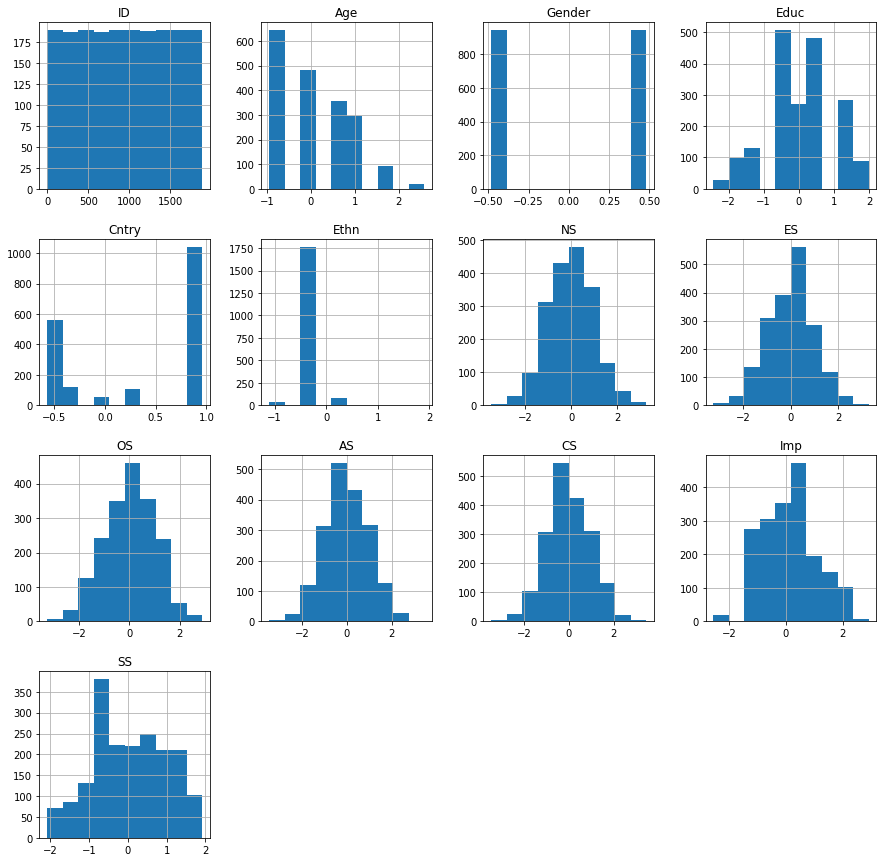

In [8]:
df.hist(figsize = (15,15))

From the plot above, we see that no drug use classes are shown as they are still encoded as text, not numbers, so we need to convert those values to numerical. In addition, it is evident that we do not have a target column for our model to use. 

## Data Fixing

### Convert Drug Classes to Numerical 

**CL0**: Never used this substance<br>
**CL1**: Used over a decade ago<br>
**CL2**: Used in last decade<br>
**CL3**: Used in last year<br>
**CL4**: Used in last month<br>
**CL5**: Used in last week<br>
**CL6**: Used in last day<br>

In [9]:

#df.replace(["CL0","CL1","CL2","CL3","CL4","CL5","CL6"],[-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0],inplace=True)
df.replace(["CL0","CL1","CL2","CL3","CL4","CL5","CL6"],[0.0,1.0,2.0,3.0,4.0,5.0,6.0],inplace=True)
df

,ID,Age,Gender,Educ,Cntry,Ethn,NS,ES,OS,AS,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0,0.0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,5.0
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,2.0,0.0,0.0,3.0,5.0,4.0,4.0,5.0,0.0,0.0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,4.0,0.0,2.0,0.0,2.0,0.0,2.0,6.0,0.0,0.0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,3.0,0.0,0.0,3.0,3.0,0.0,3.0,4.0,0.0,0.0


### Create Target Column

The Target Column named Drug Use will be a binary column that is made up of 0s and 1s. 0 means the individual is not likely to use drugs while 1 means that the individual is likely to use. 

In [10]:
drug_names = ["Amphet","Amyl","Benzos","Cannabis","Coke","Crack","Ecstasy","Heroin","Ketamine","LegalH","LSD","Meth","Shrooms","Semer","VSA"]
df["Drug Use"]=int(0)
for i in df.index.values:
    count = -1
    while count < 14:
        count += 1
        if df.loc[i, drug_names[count]] > 1.0:
            # set the target column to 1 
            df.loc[[i],['Drug Use']] = int(1)
            break

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Educ'}>,
        <AxesSubplot:title={'center':'Cntry'}>,
        <AxesSubplot:title={'center':'Ethn'}>],
       [<AxesSubplot:title={'center':'NS'}>,
        <AxesSubplot:title={'center':'ES'}>,
        <AxesSubplot:title={'center':'OS'}>,
        <AxesSubplot:title={'center':'AS'}>,
        <AxesSubplot:title={'center':'CS'}>,
        <AxesSubplot:title={'center':'Imp'}>],
       [<AxesSubplot:title={'center':'SS'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Amphet'}>,
        <AxesSubplot:title={'center':'Amyl'}>,
        <AxesSubplot:title={'center':'Benzos'}>,
        <AxesSubplot:title={'center':'Caffeine'}>],
       [<AxesSubplot:title={'center':'Cannabis'}>,
        <AxesSubplot:title={'center':'Choco'}>,
        <AxesSubplot:title={'center':'Coke'}>,
       

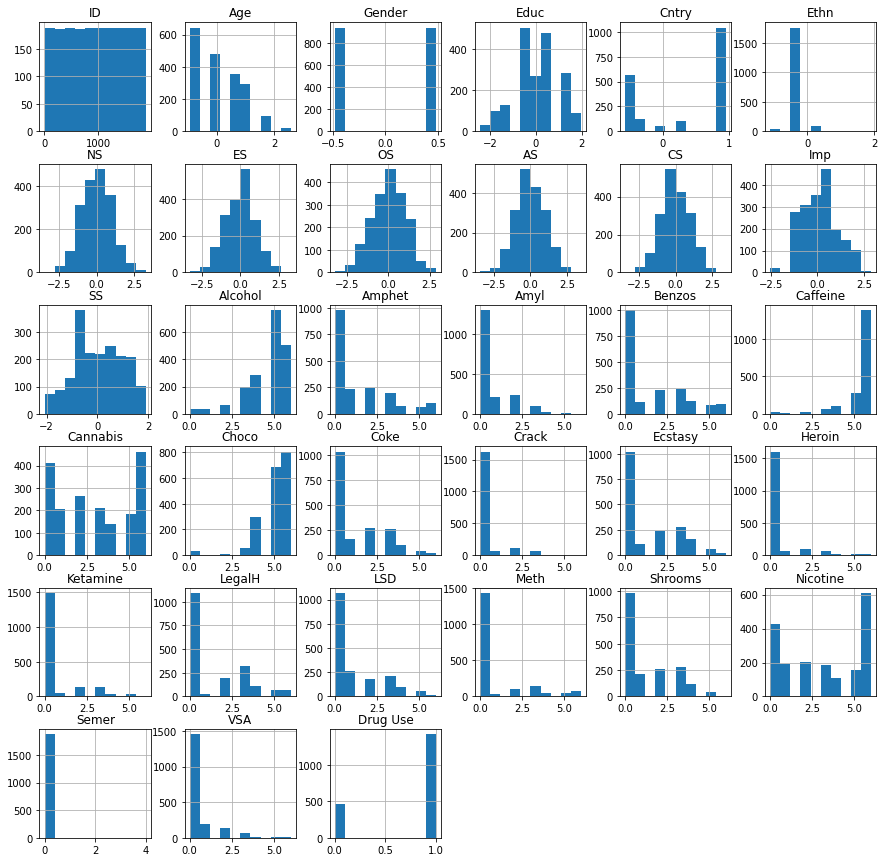

In [11]:
df.hist(figsize = (15,15))

C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[<matplotlib.axis.XTick at 0x1520107d070>,
 [Text(0, 0, 'Not Likely to Use'), Text(1, 0, 'Likely to Use')]]

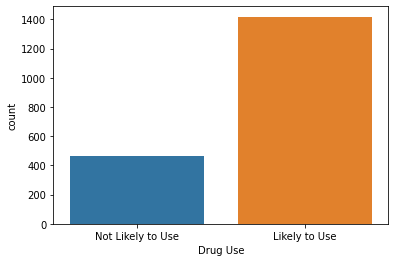

In [12]:
labels=['Not Likely to Use','Likely to Use']
t=sns.countplot(df['Drug Use'])
t.set(xticks=range(len(labels)), xticklabels=[i for i in labels])

From the above plot, we see that there is an imbalance in the classification of whether an individual is more likely to to use drugs than not, by a significant amount. Because of this imbalance, we must use an undersampling method when creating training and test data sets for modeling. 

## Feature Selection

In [13]:
X = df[column_names]
drug_corr = X.corr()
drug_corr

,ID,Age,Gender,Educ,Cntry,Ethn,NS,ES,OS,AS,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Shrooms,Nicotine,Semer,VSA
ID,1.000000,-0.271395,-0.025467,-0.025253,-0.340751,0.059309,0.018639,-0.046960,0.173565,-0.028782,...,0.167231,0.091180,0.074800,0.220806,0.215234,0.175429,0.202910,0.063197,0.050454,0.101165
Age,-0.271395,1.000000,0.110286,0.158811,0.354241,-0.069753,-0.136654,-0.033849,-0.226778,0.063504,...,-0.384784,-0.121675,-0.220689,-0.419839,-0.323207,-0.191503,-0.331456,-0.248883,-0.049729,-0.229657
Gender,-0.025467,0.110286,1.000000,0.196774,0.216271,-0.001213,0.074646,0.057864,-0.131021,0.219743,...,-0.228574,-0.136728,-0.189825,-0.315676,-0.278983,-0.181489,-0.272431,-0.192084,0.013354,-0.134852
Educ,-0.025253,0.158811,0.196774,1.000000,0.225311,-0.036099,-0.100993,0.115645,0.057994,0.091088,...,-0.159819,-0.131051,-0.076479,-0.208656,-0.177817,-0.170103,-0.169762,-0.240547,-0.036342,-0.120540
Cntry,-0.340751,0.354241,0.216271,0.225311,1.000000,-0.127946,-0.136191,0.109524,-0.341969,0.150921,...,-0.336328,-0.300210,-0.112577,-0.426030,-0.498263,-0.413946,-0.490052,-0.277913,-0.068018,-0.267033
Ethn,0.059309,-0.069753,-0.001213,-0.036099,-0.127946,1.000000,0.047642,0.018402,0.084816,-0.038726,...,0.071826,0.042881,0.031961,0.077511,0.129031,0.063805,0.115962,0.077724,0.022716,0.087011
NS,0.018639,-0.136654,0.074646,-0.100993,-0.136191,0.047642,1.000000,-0.431051,0.010177,-0.216964,...,0.069948,0.172685,0.062750,0.113342,0.037095,0.184672,0.042386,0.128430,-0.001673,0.115086
ES,-0.046960,-0.033849,0.057864,0.115645,0.109524,0.018402,-0.431051,1.000000,0.245277,0.157336,...,0.078822,-0.079998,0.018727,-0.037383,0.018166,-0.121708,0.021105,-0.019196,0.022909,-0.032910
OS,0.173565,-0.226778,-0.131021,0.057994,-0.341969,0.084816,0.010177,0.245277,1.000000,0.038516,...,0.296306,0.134194,0.185061,0.317322,0.369759,0.171984,0.369139,0.195460,0.026774,0.150502
AS,-0.028782,0.063504,0.219743,0.091088,0.150921,-0.038726,-0.216964,0.157336,0.038516,1.000000,...,-0.114550,-0.169886,-0.110763,-0.139983,-0.093888,-0.156847,-0.111424,-0.111075,0.019750,-0.114083


Text(0.5, 1.0, 'Correlation between all the features')

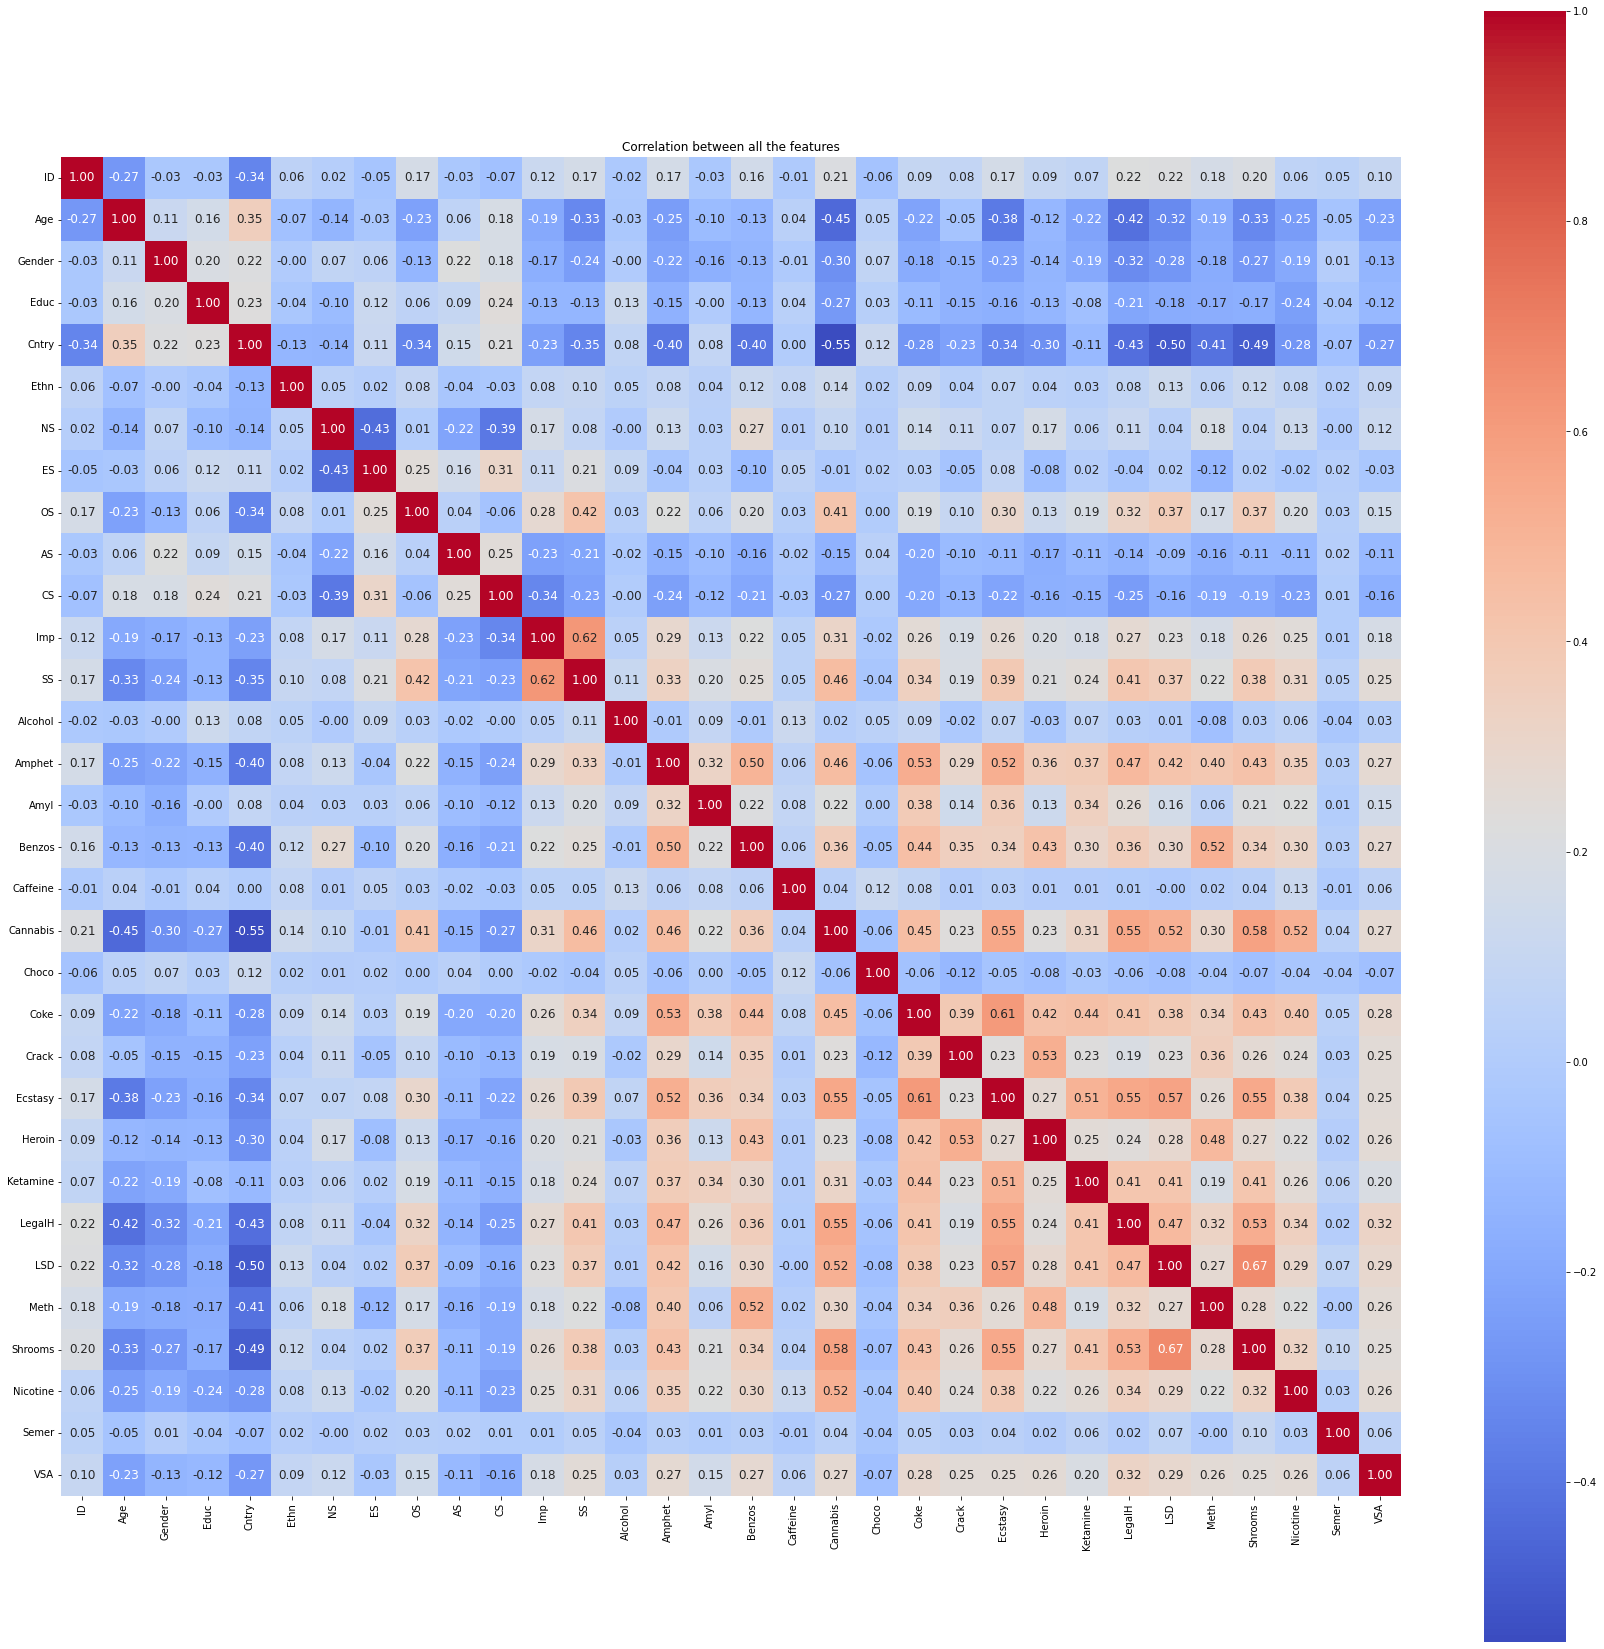

In [14]:
# Plotting Heatmaps for Correlations between all the features
plt.figure(figsize=(30,30))
sns.heatmap(drug_corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'coolwarm')
plt.title('Correlation between all the features')

From the above heatmap, it is a bit of a pain to manually go through each feature and pick out which ones are significiant given that there are 31 features (excluding the ID and Target Column). To avoid manually doing this, we will use the sci-kit learn's automatic feature selection to simplify things. 

### Automated Feature Selection

In [15]:
X = df[column_names]
y = df['Drug Use']

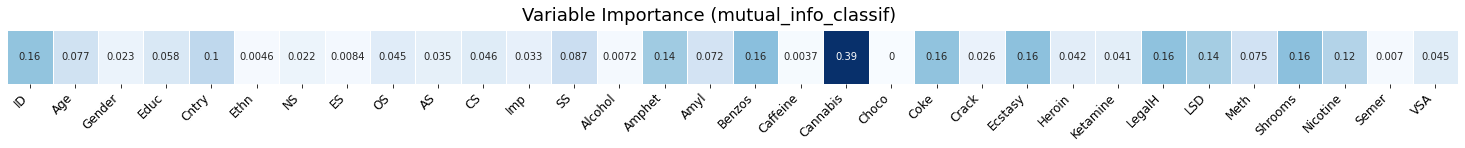

In [16]:
drug_mutual_information = mutual_info_classif(X, y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(drug_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

From the above plot, we see the mutual variable importance of each feature. Mutual information (MI) is a non-negative value measuring the dependency between two variables. If two varaibles are independent of each other then, the MI score will be 0. The higher the MI score, the more dependent the target outcome is on that feature. The scores are determined using methods based on entropy estimation from KNN distances. 
 Based on the MI scores above, Cannabis is the most important feature. Now in order to minimize the number of features to the features we are deeming influential on determining the target outcome, we will initially take the top 50% of the features based on there.

In [17]:
trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=50)
kepler_X_trans = trans.fit_transform(X, y)
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, kepler_X_trans.shape[1]))

We started with 31 features but retained only 16 of them!


In [18]:
columns_retained_Select = X.columns[trans.get_support()].values
X=pd.DataFrame(kepler_X_trans, columns=columns_retained_Select)
X

,ID,Age,Cntry,SS,Amphet,Benzos,Cannabis,Coke,Ecstasy,Ketamine,LegalH,LSD,Meth,Shrooms,Nicotine,VSA
0,1.0,0.49788,0.96082,-1.18084,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2.0,-0.07854,0.96082,-0.21575,2.0,0.0,4.0,3.0,4.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
2,3.0,0.49788,0.96082,0.40148,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,-0.95197,0.96082,-1.18084,0.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
4,5.0,0.49788,0.96082,-0.21575,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884.0,-0.95197,-0.57009,1.92173,0.0,0.0,5.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,5.0
1881,1885.0,-0.95197,-0.57009,0.76540,0.0,0.0,3.0,0.0,2.0,0.0,3.0,5.0,4.0,4.0,5.0,0.0
1882,1886.0,-0.07854,-0.57009,-0.52593,6.0,5.0,6.0,4.0,4.0,2.0,0.0,2.0,0.0,2.0,6.0,0.0
1883,1887.0,-0.95197,-0.57009,1.22470,0.0,0.0,6.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,4.0,0.0


In [19]:
y = df['Drug Use']

## Oversampling

In order to address the imbalance between the majority class (More Likely to Use Drugs) and the minority class (Not Likely to use Drugs), we will employ the method of oversampling to prevent the model from overfitting due to the large number of the majority class.  

In [20]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1319, 16)
(1319,)
(566, 16)
(566,)


In [21]:
print("Before oversampling: ", Counter(y_train))

Before oversampling:  Counter({1: 1000, 0: 319})


In [22]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [23]:
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [24]:
# summarize class distribution
print("After undersampling: ", Counter(y_train_over))

After undersampling:  Counter({1: 1000, 0: 1000})


We increased the number of minority class from 319 to 1000 so the ratio bewteen the majority to minority is 1:1. 

## Undersampling

In order to address the imbalance between the majority class (More Likely to Use Drugs) and the minority class (Not Likely to use Drugs), we will employ the method of undersampling to prevent the model from overfitting due to the large number of the majority class.  

In [25]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1319, 16)
(1319,)
(566, 16)
(566,)


In [26]:
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({1: 1000, 0: 319})


In [27]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [28]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [29]:
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0: 319, 1: 319})


We reduced the number of majority class from 1000 to 319 so the ratio bewteen the majority to minority is 1:1. 

# Modeling

We will be using GridSearchCV to find the best model to use for our data. Moreover, it allows us to implement cross validation to prevent us from using a single train test split later on. 

In [30]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,20]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        'guassian bayes naive ': {
            'model': GaussianNB(),
            'parameters': {
               }
        },
        'LDA': {
            'model': LinearDiscriminantAnalysis(),
            'parameters': {
               }
        },
        'LASSO': {
            'model': linear_model.Lasso(alpha=0.1),
            'parameters': {
               }
        },
        'QDA': {
            'model': QDA(),
            'parameters': {
               }
        },
        'RIDGE': {
            'model': Ridge(alpha=1.0),
            'parameters': {
               }
        },


    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score']).sort_values(by='score', ascending=False)



##  GridSearchCV Without Undersampling

In [31]:
find_best_model(X_train, y_train)

C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

,model,best_parameters,score
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.995449
2,random_forest,{'n_estimators': 50},0.993176
0,logistic_regression,{'C': 10},0.971189
6,QDA,{},0.937055
4,LDA,{},0.930997
3,guassian bayes naive,{},0.914302
7,RIDGE,{},0.490626
5,LASSO,{},0.464053


From the table above, we see that without undersampling, most of our scores are very high, nearly reaching 1.0 which is a clear sign that we are overfitting. So let's not check what happens with the scores with the undersampled data. 

## GridSearch CV With Undersampling 

In [32]:
find_best_model(X_train_under, y_train_under)

C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

,model,best_parameters,score
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.996863
2,random_forest,{'n_estimators': 20},0.993725
0,logistic_regression,{'C': 10},0.976501
6,QDA,{},0.945140
3,guassian bayes naive,{},0.938866
4,LDA,{},0.895017
7,RIDGE,{},0.128602
5,LASSO,{},0.121150


With the undersampled train data, we see that the scores virtually stay the same, but we can say that these scores are more accurate as undersampling prevents us from overfitting in many cases. In this specific case when choosing a model, I would not choose the models that have a score of 0.99 as those are too high and more prone to be overfitted. As a result it would be best to choose a model like Quadratic Discrimenant Analysis (QDA) model or the Logisitic Regression Model as they both have high scores but are not exactly 1.0. 

## GridSearch CV With Oversampling

In [33]:
find_best_model(X_train_over, y_train_over)

C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

,model,best_parameters,score
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.997500
2,random_forest,{'n_estimators': 15},0.997500
0,logistic_regression,{'C': 5},0.974000
6,QDA,{},0.936500
3,guassian bayes naive,{},0.918000
4,LDA,{},0.897000
7,RIDGE,{},0.344453
5,LASSO,{},0.325839


In [34]:
scores = cross_val_score(QDA(), X_train_under, y_train_under, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [35]:
scores = cross_val_score(QDA(), X_train_over, y_train_over, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 94%


In [36]:
scores = cross_val_score(LogisticRegression(solver='lbfgs', multi_class='auto',C=10), X_train_under, y_train_under, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 98%


C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

In [37]:
scores = cross_val_score(LogisticRegression(solver='lbfgs', multi_class='auto',C=5), X_train_over, y_train_over, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Average Accuracy : 97%


Based on the average accuracy scores of each model, the Logistic Regression Model had the best average accuracy regardless of sampling method. Now we must choose which sampling method returrns the best model. 

## Logistic Regression

### Undersampling Logistic Regression Model

Logistic Regression Training Score: 
 0.9749216300940439
Logistic Regression Test Score: 
 0.9575971731448764
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       148
           1       0.99      0.95      0.97       418

    accuracy                           0.96       566
   macro avg       0.93      0.96      0.95       566
weighted avg       0.96      0.96      0.96       566



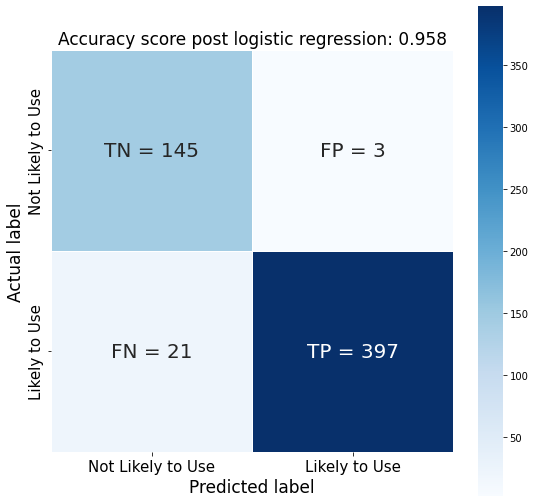

In [35]:
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('logistic', LogisticRegression(solver='lbfgs', multi_class='auto',C=10))])

pipe.fit(X_train_under, y_train_under)
# Get Model Performance
print('Logistic Regression Training Score: \n',pipe.score(X_train_under, y_train_under))
print('Logistic Regression Test Score: \n', pipe.score(X_test, y_test))
print('Classification Report: \n', classification_report(y_test,pipe.predict(X_test)))
score_logreg_train = pipe.score(X_train_under, y_train_under)
score_logreg_test = pipe.score(X_test, y_test)
cm_logreg = metrics.confusion_matrix(y_test, pipe.predict(X_test))
modified_cm = []
for index,value in enumerate(cm_logreg):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
plt.figure(figsize=(9,9))
p=sns.heatmap(cm_logreg, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = [ 'Not Likely to Use','Likely to Use'],
            yticklabels = ['Not Likely to Use','Likely to Use'],
            )

plt.ylabel('Actual label', fontsize = 17)
plt.xlabel('Predicted label', fontsize = 17)
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score_logreg_test), size = 17)
plt.tick_params(labelsize= 15)
plt.savefig('logreg_cm.png')

### Oversampling Logistic Regression Model

Logistic Regression Training Score: 
 0.9745
Logistic Regression Test Score: 
 0.9558303886925795
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       148
           1       0.99      0.95      0.97       418

    accuracy                           0.96       566
   macro avg       0.93      0.96      0.95       566
weighted avg       0.96      0.96      0.96       566



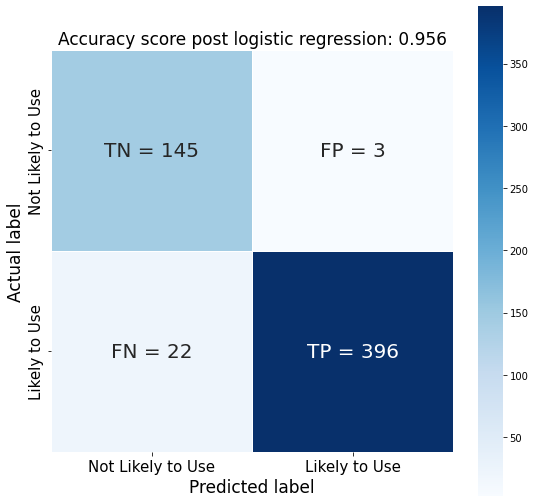

In [36]:
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('logistic', LogisticRegression(solver='lbfgs', multi_class='auto',C=5))])

pipe.fit(X_train_over, y_train_over)
# Get Model Performance
print('Logistic Regression Training Score: \n',pipe.score(X_train_over, y_train_over))
print('Logistic Regression Test Score: \n', pipe.score(X_test, y_test))
print('Classification Report: \n', classification_report(y_test,pipe.predict(X_test)))
score_logreg_train = pipe.score(X_train_over, y_train_over)
score_logreg_test = pipe.score(X_test, y_test)
cm_logreg = metrics.confusion_matrix(y_test, pipe.predict(X_test))
modified_cm = []
for index,value in enumerate(cm_logreg):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
plt.figure(figsize=(9,9))
p=sns.heatmap(cm_logreg, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = [ 'Not Likely to Use','Likely to Use'],
            yticklabels = [ 'Not Likely to Use','Likely to Use'],
            )

plt.ylabel('Actual label', fontsize = 17)
plt.xlabel('Predicted label', fontsize = 17)
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score_logreg_test), size = 17)
plt.tick_params(labelsize= 15)
plt.savefig('logreg_cm.png')

From the individual model performance, it would be best to go with the  Oversampling Logisitc Regression Model as it seems that this specific Logistic Regression Model has a Training Score which is higher than its test score. For accuracy scores, we typically want the test score to be less than the training score, but it is't a requirements by any means. Moreover, it is a more generalizable model than the undersampled model. 